turkey_last_20_years_clustering

Engin Abdan

### Import

In [2581]:
import pandas as pd
import numpy as np
import pandasdmx as pdmx

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import skew

from sklearn.preprocessing import MinMaxScaler
from pyclustertend import hopkins
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.style.use('classic')
sns.set_style("white")

### Data

In [2582]:
df1 = pd.read_csv("turkey_60_col_data.csv")
df1.head(2)

,Country Name,Country Code,Time,Time Code,Consumer price index (2010 = 100) [FP.CPI.TOTL],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Compensation of employees (% of expense) [GC.XPN.COMP.ZS],Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot],...,Short-term debt (% of total reserves) [DT.DOD.DSTC.IR.ZS],"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) [SH.ALC.PCAP.LI]","Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]","Trademark applications, resident, by count [IP.TMK.RSCT]",Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS],Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS],Unemployment with intermediate education (% of total labor force with intermediate education) [SL.UEM.INTM.ZS],"Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]","Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]",Wholesale price index (2010 = 100) [FP.WPI.TOTL]
0,Turkiye,TUR,2002.0,YR2002,46.096344,1.929000e+11,38.661392,..,..,..,...,57.937006,..,2.834803e+10,..,..,9.79,14.70,10.728,9.467,45.8388393595669
1,Turkiye,TUR,2003.0,YR2003,56.054279,2.558000e+11,33.929963,..,..,..,...,64.736892,..,3.554851e+10,..,..,10.18,12.77,10.714,10.104,57.5565268750552


In [2583]:
df2 = pd.read_csv("turkey_6_col_data.csv")
df2.head(2)

,Country Name,Country Code,Time,Time Code,Control of Corruption: Estimate [CC.EST],Government Effectiveness: Estimate [GE.EST],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Regulatory Quality: Estimate [RQ.EST],Rule of Law: Estimate [RL.EST],Voice and Accountability: Estimate [VA.EST]
0,Turkey,TUR,2002.0,YR2002,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571
1,Turkey,TUR,2003.0,YR2003,-0.183856,0.052294,-0.766921,0.043717,0.151064,-0.033271


### Data Info

In [2584]:
print(df1.shape)
print(df2.shape)

(24, 64)
(24, 10)


In [2585]:
df1.tail(10)

,Country Name,Country Code,Time,Time Code,Consumer price index (2010 = 100) [FP.CPI.TOTL],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Compensation of employees (% of expense) [GC.XPN.COMP.ZS],Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot],...,Short-term debt (% of total reserves) [DT.DOD.DSTC.IR.ZS],"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) [SH.ALC.PCAP.LI]","Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]","Trademark applications, resident, by count [IP.TMK.RSCT]",Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS],Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS],Unemployment with intermediate education (% of total labor force with intermediate education) [SL.UEM.INTM.ZS],"Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]","Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]",Wholesale price index (2010 = 100) [FP.WPI.TOTL]
14,Turkiye,TUR,2016.0,YR2016,157.424794,7.293000e+11,55.222719,31.6533464954349,25.0035445045936,1.33637949819189,...,96.595909,..,1.048105e+11,193824,11.8299999237061,10.02,12.44,9.527,13.598,..
15,Turkiye,TUR,2017.0,YR2017,174.968703,7.167000e+11,53.854329,..,21.9120107757068,..,...,111.337698,..,1.076570e+11,215220,12.4099998474121,9.68,12.46,9.342,13.848,..
16,Turkiye,TUR,2018.0,YR2018,203.545404,6.580000e+11,53.150932,..,22.0137445262696,1.449037421,...,125.266414,2.05,9.299723e+10,211109,12.1899995803833,10.01,12.15,9.484,13.733,..
17,Turkiye,TUR,2019.0,YR2019,234.437126,6.323000e+11,58.773089,..,22.5036032616633,1.826805966,...,116.552217,..,1.056197e+11,248754,13.5,13.10,15.63,12.311,16.385,..
18,Turkiye,TUR,2020.0,YR2020,263.223561,6.018000e+11,67.500617,..,23.5225334110894,..,...,148.043724,..,9.351156e+10,331480,12.6300001144409,12.56,14.96,12.294,14.830,..
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Data from database: World Development Indicators,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Last Updated: 07/20/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2586]:
df2.tail(10)

,Country Name,Country Code,Time,Time Code,Control of Corruption: Estimate [CC.EST],Government Effectiveness: Estimate [GE.EST],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Regulatory Quality: Estimate [RQ.EST],Rule of Law: Estimate [RL.EST],Voice and Accountability: Estimate [VA.EST]
14,Turkey,TUR,2016.0,YR2016,-0.191456,0.048245,-2.009063,0.196142,-0.208760,-0.607185
15,Turkey,TUR,2017.0,YR2017,-0.194494,0.073263,-1.788514,0.035844,-0.254829,-0.705860
16,Turkey,TUR,2018.0,YR2018,-0.329821,0.006252,-1.318893,0.015110,-0.317522,-0.851069
17,Turkey,TUR,2019.0,YR2019,-0.308261,0.047889,-1.371728,-0.007641,-0.282656,-0.834300
18,Turkey,TUR,2020.0,YR2020,-0.340780,-0.044045,-1.187760,-0.010660,-0.358622,-0.861699
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,Data from database: Worldwide Governance Indic...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23,Last Updated: 09/27/2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

In [2587]:
df1.drop([19,20,21,22,23], axis=0, inplace=True)
df2.drop([19,20,21,22,23], axis=0, inplace=True)

In [2588]:
print(df1.shape)
print(df2.shape)

(19, 64)
(19, 10)


In [2589]:
df1 = df1.drop(columns=["Country Name","Country Code","Time Code"])
df1 = df1.rename(columns={"Time":"year"})
df2 = df2.drop(columns=["Country Name","Country Code","Time Code"])
df2 = df2.rename(columns={"Time":"year"})

In [2590]:
from numpy import NaN
df1 = df1.replace("..",NaN)
df1

,year,Consumer price index (2010 = 100) [FP.CPI.TOTL],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Compensation of employees (% of expense) [GC.XPN.COMP.ZS],Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot],CPIA financial sector rating (1=low to 6=high) [IQ.CPA.FINS.XQ],CPIA macroeconomic management rating (1=low to 6=high) [IQ.CPA.MACR.XQ],CPIA property rights and rule-based governance rating (1=low to 6=high) [IQ.CPA.PROP.XQ],...,Short-term debt (% of total reserves) [DT.DOD.DSTC.IR.ZS],"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age) [SH.ALC.PCAP.LI]","Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]","Trademark applications, resident, by count [IP.TMK.RSCT]",Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS],Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS],Unemployment with intermediate education (% of total labor force with intermediate education) [SL.UEM.INTM.ZS],"Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]","Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]",Wholesale price index (2010 = 100) [FP.WPI.TOTL]
0,2002.0,46.096344,1.929000e+11,38.661392,NaN,NaN,NaN,NaN,NaN,NaN,...,57.937006,NaN,2.834803e+10,NaN,NaN,9.79,14.70,10.728,9.467,45.8388393595669
1,2003.0,56.054279,2.558000e+11,33.929963,NaN,NaN,NaN,NaN,NaN,NaN,...,64.736892,NaN,3.554851e+10,NaN,NaN,10.18,12.77,10.714,10.104,57.5565268750552
2,2004.0,60.873972,3.364000e+11,33.201796,NaN,NaN,NaN,NaN,NaN,NaN,...,82.728125,NaN,3.730412e+10,NaN,12.2200002670288,9.86,15.19,10.788,10.988,63.9407933594168
3,2005.0,65.852952,4.211000e+11,38.678568,NaN,NaN,NaN,NaN,NaN,NaN,...,74.134269,2.12,5.249394e+10,NaN,10.0299997329712,10.15,13.78,10.451,11.181,69.2075441362399
4,2006.0,72.173019,4.643000e+11,40.397518,NaN,NaN,NaN,NaN,NaN,NaN,...,67.739046,NaN,6.326484e+10,NaN,8.13000011444092,8.37,11.08,8.586,9.096,75.9662204044861
5,2007.0,78.492620,5.690000e+11,41.726424,NaN,NaN,NaN,NaN,NaN,NaN,...,56.397626,NaN,7.649613e+10,109486,8.48999977111816,8.36,11.13,8.770,9.150,80.758439749955
6,2008.0,86.690490,6.428000e+11,46.109028,41.2155893803707,21.0636761310251,NaN,NaN,NaN,NaN,...,71.275500,NaN,7.367468e+10,115999,9.15999984741211,9.42,11.39,9.610,9.980,91.0285954600447
7,2009.0,92.109492,5.357000e+11,51.759529,50.1129561092721,20.2344840714142,1.13946823961092,NaN,NaN,NaN,...,65.360969,NaN,7.493310e+10,108003,10.8199996948242,12.39,15.16,12.528,12.608,92.1524891889216
8,2010.0,100.000000,6.508000e+11,52.883605,47.1216697776893,22.0028829308068,1.04459968346321,NaN,NaN,NaN,...,89.847003,2.32,8.595946e+10,NaN,9.77999973297119,10.42,13.11,10.363,11.382,100
9,2011.0,106.471880,7.082000e+11,50.635235,42.0450131192022,22.904348069012,0.853320370913091,NaN,NaN,NaN,...,92.743401,NaN,8.793725e+10,152271,9.36999988555908,8.25,10.67,8.263,10.062,111.085286768463


In [2591]:
def show_nans(df1, limit):
    missing = df1.isnull().sum()*100/df1.shape[0]
    return missing.loc[lambda x : x >= limit]
df1.drop(show_nans(df1,70).index, axis=1, inplace=True)

In [2592]:
df2.isnull().sum()

year                                                                        0
Control of Corruption: Estimate [CC.EST]                                    0
Government Effectiveness: Estimate [GE.EST]                                 0
Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]    0
Regulatory Quality: Estimate [RQ.EST]                                       0
Rule of Law: Estimate [RL.EST]                                              0
Voice and Accountability: Estimate [VA.EST]                                 0
dtype: int64

In [2593]:
print(df1.shape)
print(df2.shape)

(19, 50)
(19, 7)


In [2594]:
df1 = df1.apply(pd.to_numeric)
df2 = df2.apply(pd.to_numeric)

In [2595]:
df1

,year,Consumer price index (2010 = 100) [FP.CPI.TOTL],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Compensation of employees (% of expense) [GC.XPN.COMP.ZS],Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot],Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS],Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS],Domestic credit to private sector by banks (% of GDP) [FD.AST.PRVT.GD.ZS],...,S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],Short-term debt (% of total reserves) [DT.DOD.DSTC.IR.ZS],"Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]","Trademark applications, resident, by count [IP.TMK.RSCT]",Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS],Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS],Unemployment with intermediate education (% of total labor force with intermediate education) [SL.UEM.INTM.ZS],"Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]","Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]",Wholesale price index (2010 = 100) [FP.WPI.TOTL]
0,2002.0,46.096344,1.929000e+11,38.661392,NaN,NaN,NaN,NaN,NaN,14.054762,...,-33.470001,57.937006,2.834803e+10,NaN,NaN,9.79,14.70,10.728,9.467,45.838839
1,2003.0,56.054279,2.558000e+11,33.929963,NaN,NaN,NaN,NaN,NaN,14.010660,...,113.199997,64.736892,3.554851e+10,NaN,NaN,10.18,12.77,10.714,10.104,57.556527
2,2004.0,60.873972,3.364000e+11,33.201796,NaN,NaN,NaN,NaN,NaN,16.572396,...,32.910000,82.728125,3.730412e+10,NaN,12.22,9.86,15.19,10.788,10.988,63.940793
3,2005.0,65.852952,4.211000e+11,38.678568,NaN,NaN,NaN,NaN,NaN,21.223736,...,49.465626,74.134269,5.249394e+10,NaN,10.03,10.15,13.78,10.451,11.181,69.207544
4,2006.0,72.173019,4.643000e+11,40.397518,NaN,NaN,NaN,NaN,NaN,24.723486,...,-3.993010,67.739046,6.326484e+10,NaN,8.13,8.37,11.08,8.586,9.096,75.966220
5,2007.0,78.492620,5.690000e+11,41.726424,NaN,NaN,NaN,NaN,NaN,28.016249,...,74.821649,56.397626,7.649613e+10,109486.0,8.49,8.36,11.13,8.770,9.150,80.758440
6,2008.0,86.690490,6.428000e+11,46.109028,41.215589,21.063676,NaN,51.782373,33.376645,30.896647,...,-62.400823,71.275500,7.367468e+10,115999.0,9.16,9.42,11.39,9.610,9.980,91.028595
7,2009.0,92.109492,5.357000e+11,51.759529,50.112956,20.234484,1.139468,61.240269,37.080220,34.533659,...,99.604544,65.360969,7.493310e+10,108003.0,10.82,12.39,15.16,12.528,12.608,92.152489
8,2010.0,100.000000,6.508000e+11,52.883605,47.121670,22.002883,1.044600,67.600520,44.362208,41.599783,...,21.368826,89.847003,8.595946e+10,NaN,9.78,10.42,13.11,10.363,11.382,100.000000
9,2011.0,106.471880,7.082000e+11,50.635235,42.045013,22.904348,0.853320,66.155111,49.056424,46.159692,...,-37.005910,92.743401,8.793725e+10,152271.0,9.37,8.25,10.67,8.263,10.062,111.085287


In [2596]:
df2

,year,Control of Corruption: Estimate [CC.EST],Government Effectiveness: Estimate [GE.EST],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Regulatory Quality: Estimate [RQ.EST],Rule of Law: Estimate [RL.EST],Voice and Accountability: Estimate [VA.EST]
0,2002.0,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571
1,2003.0,-0.183856,0.052294,-0.766921,0.043717,0.151064,-0.033271
2,2004.0,-0.175138,0.008839,-0.834218,0.057826,0.126244,0.013202
3,2005.0,-0.031314,0.154204,-0.601539,0.277378,0.159731,0.000234
4,2006.0,0.027346,0.120086,-0.589657,0.289125,0.048252,-0.064095
5,2007.0,0.105276,0.306561,-0.817548,0.317291,0.021233,-0.053325
6,2008.0,0.112360,0.268657,-0.823570,0.259385,0.083061,-0.041286
7,2009.0,0.087780,0.277977,-1.031842,0.280102,0.104889,-0.055523
8,2010.0,0.029284,0.294847,-0.915285,0.298663,0.110670,-0.084821
9,2011.0,0.044252,0.348577,-0.959997,0.370338,0.074786,-0.136851


In [2597]:
def show_nans(df1, limit):
    missing = df1.isnull().sum()*100/df1.shape[0]
    return missing.loc[lambda x : x >= limit]
show_nans(df1,1)

Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]                                             52.631579
Compensation of employees (% of expense) [GC.XPN.COMP.ZS]                                                 31.578947
Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot]                   47.368421
Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS]                               31.578947
Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]                                          31.578947
Electricity production from natural gas sources (% of total) [EG.ELC.NGAS.ZS]                             26.315789
Employment in agriculture (% of total employment) (modeled ILO estimate) [SL.AGR.EMPL.ZS]                  5.263158
Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]                     5.263158
Employment in services (% of total employment) (modeled ILO estimate) [S

In [2598]:
show_nans(df1,1).index.nunique()

20

In [2599]:
a = list(df1.columns)
b = list(show_nans(df1,1).index)

for i in b:
    c = a.index(i)
    d = df1.iloc[:,c]
    if d.isnull().iloc[0] == True:
        d.iloc[0] = abs(d.mean())
    if d.isnull().iloc[-1] == True:
        d.iloc[-1] = abs(d.mean())
df1

,year,Consumer price index (2010 = 100) [FP.CPI.TOTL],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Compensation of employees (% of expense) [GC.XPN.COMP.ZS],Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot],Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS],Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS],Domestic credit to private sector by banks (% of GDP) [FD.AST.PRVT.GD.ZS],...,S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],Short-term debt (% of total reserves) [DT.DOD.DSTC.IR.ZS],"Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]","Trademark applications, resident, by count [IP.TMK.RSCT]",Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS],Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS],Unemployment with intermediate education (% of total labor force with intermediate education) [SL.UEM.INTM.ZS],"Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]","Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]",Wholesale price index (2010 = 100) [FP.WPI.TOTL]
0,2002.0,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.973500,57.999863,14.054762,...,-33.470001,57.937006,2.834803e+10,189374.307692,10.588823,9.79,14.70,10.728,9.467,45.838839
1,2003.0,56.054279,2.558000e+11,33.929963,NaN,NaN,NaN,NaN,NaN,14.010660,...,113.199997,64.736892,3.554851e+10,NaN,NaN,10.18,12.77,10.714,10.104,57.556527
2,2004.0,60.873972,3.364000e+11,33.201796,NaN,NaN,NaN,NaN,NaN,16.572396,...,32.910000,82.728125,3.730412e+10,NaN,12.220000,9.86,15.19,10.788,10.988,63.940793
3,2005.0,65.852952,4.211000e+11,38.678568,NaN,NaN,NaN,NaN,NaN,21.223736,...,49.465626,74.134269,5.249394e+10,NaN,10.030000,10.15,13.78,10.451,11.181,69.207544
4,2006.0,72.173019,4.643000e+11,40.397518,NaN,NaN,NaN,NaN,NaN,24.723486,...,-3.993010,67.739046,6.326484e+10,NaN,8.130000,8.37,11.08,8.586,9.096,75.966220
5,2007.0,78.492620,5.690000e+11,41.726424,NaN,NaN,NaN,NaN,NaN,28.016249,...,74.821649,56.397626,7.649613e+10,109486.000000,8.490000,8.36,11.13,8.770,9.150,80.758440
6,2008.0,86.690490,6.428000e+11,46.109028,41.215589,21.063676,NaN,51.782373,33.376645,30.896647,...,-62.400823,71.275500,7.367468e+10,115999.000000,9.160000,9.42,11.39,9.610,9.980,91.028595
7,2009.0,92.109492,5.357000e+11,51.759529,50.112956,20.234484,1.139468,61.240269,37.080220,34.533659,...,99.604544,65.360969,7.493310e+10,108003.000000,10.820000,12.39,15.16,12.528,12.608,92.152489
8,2010.0,100.000000,6.508000e+11,52.883605,47.121670,22.002883,1.044600,67.600520,44.362208,41.599783,...,21.368826,89.847003,8.595946e+10,NaN,9.780000,10.42,13.11,10.363,11.382,100.000000
9,2011.0,106.471880,7.082000e+11,50.635235,42.045013,22.904348,0.853320,66.155111,49.056424,46.159692,...,-37.005910,92.743401,8.793725e+10,152271.000000,9.370000,8.25,10.67,8.263,10.062,111.085287


In [2600]:
show_nans(df1,1).index.nunique()

13

In [2601]:
a = list(df1.columns)
b = list(show_nans(df1,1).index)

for i in b:
    c = a.index(i)
    df1.iloc[:,c] = df1.iloc[:,c].interpolate(method="quadratic")
df1

,year,Consumer price index (2010 = 100) [FP.CPI.TOTL],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Compensation of employees (% of expense) [GC.XPN.COMP.ZS],Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot],Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS],Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS],Domestic credit to private sector by banks (% of GDP) [FD.AST.PRVT.GD.ZS],...,S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],Short-term debt (% of total reserves) [DT.DOD.DSTC.IR.ZS],"Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]","Trademark applications, resident, by count [IP.TMK.RSCT]",Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS],Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS],Unemployment with intermediate education (% of total labor force with intermediate education) [SL.UEM.INTM.ZS],"Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]","Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]",Wholesale price index (2010 = 100) [FP.WPI.TOTL]
0,2002.0,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.973500,57.999863,14.054762,...,-33.470001,57.937006,2.834803e+10,189374.307692,10.588823,9.79,14.70,10.728,9.467,45.838839
1,2003.0,56.054279,2.558000e+11,33.929963,31.017063,23.421341,1.246865,60.245820,48.578784,14.010660,...,113.199997,64.736892,3.554851e+10,155574.127111,12.508582,10.18,12.77,10.714,10.104,57.556527
2,2004.0,60.873972,3.364000e+11,33.201796,26.873473,23.534784,1.269765,50.529804,41.284589,16.572396,...,32.910000,82.728125,3.730412e+10,130685.206051,12.220000,9.86,15.19,10.788,10.988,63.940793
3,2005.0,65.852952,4.211000e+11,38.678568,25.821531,23.355738,1.276345,44.825451,36.117277,21.223736,...,49.465626,74.134269,5.249394e+10,114707.544513,10.030000,10.15,13.78,10.451,11.181,69.207544
4,2006.0,72.173019,4.643000e+11,40.397518,27.861236,22.884205,1.266605,43.132762,33.076850,24.723486,...,-3.993010,67.739046,6.326484e+10,107641.142496,8.130000,8.37,11.08,8.586,9.096,75.966220
5,2007.0,78.492620,5.690000e+11,41.726424,32.992589,22.120185,1.240546,45.451736,32.163306,28.016249,...,74.821649,56.397626,7.649613e+10,109486.000000,8.490000,8.36,11.13,8.770,9.150,80.758440
6,2008.0,86.690490,6.428000e+11,46.109028,41.215589,21.063676,1.198167,51.782373,33.376645,30.896647,...,-62.400823,71.275500,7.367468e+10,115999.000000,9.160000,9.42,11.39,9.610,9.980,91.028595
7,2009.0,92.109492,5.357000e+11,51.759529,50.112956,20.234484,1.139468,61.240269,37.080220,34.533659,...,99.604544,65.360969,7.493310e+10,108003.000000,10.820000,12.39,15.16,12.528,12.608,92.152489
8,2010.0,100.000000,6.508000e+11,52.883605,47.121670,22.002883,1.044600,67.600520,44.362208,41.599783,...,21.368826,89.847003,8.595946e+10,118944.240915,9.780000,10.42,13.11,10.363,11.382,100.000000
9,2011.0,106.471880,7.082000e+11,50.635235,42.045013,22.904348,0.853320,66.155111,49.056424,46.159692,...,-37.005910,92.743401,8.793725e+10,152271.000000,9.370000,8.25,10.67,8.263,10.062,111.085287


In [2602]:
print(show_nans(df1,1).index.nunique())
print(show_nans(df2,1).index.nunique())

0
0


In [2603]:
print(df1.shape)
print(df2.shape)

(19, 50)
(19, 7)


In [2604]:
print(df1.duplicated().any())
print(df2.duplicated().any())

False
False


In [2605]:
print(df1.year.nunique())
print(df2.year.nunique())

19
19


In [2606]:
df1.head(1)

,year,Consumer price index (2010 = 100) [FP.CPI.TOTL],Adjusted net national income (current US$) [NY.ADJ.NNTY.CD],Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS],"Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]",Compensation of employees (% of expense) [GC.XPN.COMP.ZS],Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot],Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS],Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS],Domestic credit to private sector by banks (% of GDP) [FD.AST.PRVT.GD.ZS],...,S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG],Short-term debt (% of total reserves) [DT.DOD.DSTC.IR.ZS],"Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]","Trademark applications, resident, by count [IP.TMK.RSCT]",Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS],Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS],Unemployment with intermediate education (% of total labor force with intermediate education) [SL.UEM.INTM.ZS],"Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]","Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]",Wholesale price index (2010 = 100) [FP.WPI.TOTL]
0,2002.0,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.9735,57.999863,14.054762,...,-33.470001,57.937006,2.834803e+10,189374.307692,10.588823,9.79,14.7,10.728,9.467,45.838839


In [2607]:
df2.head(1)

,year,Control of Corruption: Estimate [CC.EST],Government Effectiveness: Estimate [GE.EST],Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST],Regulatory Quality: Estimate [RQ.EST],Rule of Law: Estimate [RL.EST],Voice and Accountability: Estimate [VA.EST]
0,2002.0,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571


In [2608]:
def stringToList(data):
   return list(data)

In [2609]:
a = list(df1.columns)
b = list(df2.columns)

In [2610]:
for i in df1.columns[1:]:
    if "(" in stringToList(i) and "[" in stringToList(i):
        df1.rename(columns={i:" ".join(word[0] for word in i.lower().split("(")[0].split()).replace(" ", "")}, inplace=true)
    elif "(" in stringToList(i):
        df1.rename(columns={i:" ".join(word[0] for word in i.lower().split("(")[0].split()).replace(" ", "")}, inplace=true)
    elif "[" in stringToList(i):
        df1.rename(columns={i:" ".join(word[0] for word in i.lower().split("[")[0].split()).replace(" ", "")}, inplace=true)
df1.head(1)     

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,sgei,sd,tr,tarbc,uwae,uwbe,uwie,um,uf,wpi
0,2002.0,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.9735,57.999863,14.054762,...,-33.470001,57.937006,2.834803e+10,189374.307692,10.588823,9.79,14.7,10.728,9.467,45.838839


In [2611]:
for i in df2.columns[1:]:
    if "(" in stringToList(i) and "[" in stringToList(i):
        df2.rename(columns={i:" ".join(word[0] for word in i.lower().split("(")[0].split()).replace(" ", "")}, inplace=True)
    elif "(" in stringToList(i):
        df2.rename(columns={i:" ".join(word[0] for word in i.lower().split("(")[0].split()).replace(" ", "")}, inplace=True)
    elif "[" in stringToList(i):
        df2.rename(columns={i:" ".join(word[0] for word in i.lower().split("[")[0].split()).replace(" ", "")}, inplace=True)
df2.head(1)     

,year,coce,gee,psaaove,rqe,role,vaae
0,2002.0,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571


In [2612]:
c = list(df1.columns)
d = list(df2.columns)
col_abbr_df1 = dict(zip(c,a))
col_abbr_df2 = dict(zip(d,b))

In [2613]:
# df1 COLUMN ABBREVIATION

# 'year': 'year',
# 'cpi': 'Consumer price index (2010 = 100) [FP.CPI.TOTL]',
# 'anni': 'Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]',
# 'bm': 'Broad money (% of GDP) [FM.LBL.BMNY.GD.ZS]',
# 'cgdt': 'Central government debt, total (% of GDP) [GC.DOD.TOTL.GD.ZS]',
# 'coe': 'Compensation of employees (% of expense) [GC.XPN.COMP.ZS]',
# 'coubaa': 'Coverage of unemployment benefits and ALMP (% of population) [per_lm_alllm.cov_pop_tot]',
# 'dcpbfs': 'Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS]',
# 'dctps': 'Domestic credit to private sector (% of GDP) [FS.AST.PRVT.GD.ZS]',
# 'dctpsbb': 'Domestic credit to private sector by banks (% of GDP) [FD.AST.PRVT.GD.ZS]',
# 'epfngs': 'Electricity production from natural gas sources (% of total) [EG.ELC.NGAS.ZS]',
# 'eia': 'Employment in agriculture (% of total employment) (modeled ILO estimate) [SL.AGR.EMPL.ZS]',
# 'eii': 'Employment in industry (% of total employment) (modeled ILO estimate) [SL.IND.EMPL.ZS]',
# 'eis': 'Employment in services (% of total employment) (modeled ILO estimate) [SL.SRV.EMPL.ZS]',
# 'ein': 'Energy imports, net (% of energy use) [EG.IMP.CONS.ZS]',
# 'evi': 'Export value index (2000 = 100) [TX.VAL.MRCH.XD.WD]',
# 'fe': 'Food exports (% of merchandise exports) [TX.VAL.FOOD.ZS.UN]',
# 'fi': 'Food imports (% of merchandise imports) [TM.VAL.FOOD.ZS.UN]',
# 'fa': 'Forest area (% of land area) [AG.LND.FRST.ZS]',
# 'gg': 'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
# 'g': 'GDP (current US$) [NY.GDP.MKTP.CD]',
# 'gpc': 'GDP per capita (current US$) [NY.GDP.PCAP.CD]',
# 'ge': 'Goods exports (BoP, current US$) [BX.GSR.MRCH.CD]',
# 'gi': 'Goods imports (BoP, current US$) [BM.GSR.MRCH.CD]',
# 'gne': 'Gross national expenditure (% of GDP) [NE.DAB.TOTL.ZS]',
# 'gs': 'Gross savings (% of GDP) [NY.GNS.ICTR.ZS]',
# 'ishbh2': 'Income share held by highest 20% [SI.DST.05TH.20]',
# 'icp': 'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
# 'ip': 'Interest payments (% of revenue) [GC.XPN.INTP.RV.ZS]',
# 'itnoa': 'International tourism, number of arrivals [ST.INT.ARVL]',
# 'lft': 'Labor force, total [SL.TLF.TOTL.IN]',
# 'lucp': 'Land under cereal production (hectares) [AG.LND.CREL.HA]',
# 'nca': 'Net capital account (BoP, current US$) [BN.TRF.KOGT.CD]',
# 'or': 'Oil rents (% of GDP) [NY.GDP.PETR.RT.ZS]',
# 'ngr': 'Natural gas rents (% of GDP) [NY.GDP.NGAS.RT.ZS]',
# 'par': 'Patent applications, residents [IP.PAT.RESD]',
# 'pga$ad': 'Poverty gap at $5.50 a day (2011 PPP) (%) [SI.POV.UMIC.GP]',
# 'pcrc': 'Public credit registry coverage (% of adults) [IC.CRD.PUBL.ZS]',
# 'sgei': 'S&P Global Equity Indices (annual % change) [CM.MKT.INDX.ZG]',
# 'sd': 'Short-term debt (% of total reserves) [DT.DOD.DSTC.IR.ZS]',
# 'tr': 'Total reserves (includes gold, current US$) [FI.RES.TOTL.CD]',
# 'tarbc': 'Trademark applications, resident, by count [IP.TMK.RSCT]',
# 'uwae': 'Unemployment with advanced education (% of total labor force with advanced education) [SL.UEM.ADVN.ZS]',
# 'uwbe': 'Unemployment with basic education (% of total labor force with basic education) [SL.UEM.BASC.ZS]',
# 'uwie': 'Unemployment with intermediate education (% of total labor force with intermediate education) [SL.UEM.INTM.ZS]',
# 'um': 'Unemployment, male (% of male labor force) (modeled ILO estimate) [SL.UEM.TOTL.MA.ZS]',
# 'uf': 'Unemployment, female (% of female labor force) (modeled ILO estimate) [SL.UEM.TOTL.FE.ZS]',
# 'wpi': 'Wholesale price index (2010 = 100) [FP.WPI.TOTL]'

In [2614]:
# df2 COLUMN ABBREVIATION

# 'year': 'year',
# 'coce': 'Control of Corruption: Estimate [CC.EST]',
# 'gee': 'Government Effectiveness: Estimate [GE.EST]',
# 'psaaove': 'Political Stability and Absence of Violence/Terrorism: Estimate [PV.EST]',
# 'rqe': 'Regulatory Quality: Estimate [RQ.EST]',
# 'role': 'Rule of Law: Estimate [RL.EST]',
# 'vaae': 'Voice and Accountability: Estimate [VA.EST]

In [2615]:
df1.describe()

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,sgei,sd,tr,tarbc,uwae,uwbe,uwie,um,uf,wpi
count,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,...,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2011.000000,122.142585,5.890158e+11,48.541178,35.481514,23.028000,1.223756,67.358661,52.800994,43.506416,...,13.863078,89.752909,8.466866e+10,172568.029936,10.689863,9.874211,12.577895,9.866579,11.614579,95.638045
std,5.627314,61.619635,1.790208e+11,8.796303,6.636303,1.289855,0.234011,15.209500,14.538423,19.833066,...,49.425968,24.475889,3.070865e+10,58317.152283,1.595182,1.487740,1.858466,1.452192,2.104188,24.974187
min,2002.000000,46.096344,1.929000e+11,33.201796,25.821531,20.234484,0.827595,43.132762,32.163306,14.010660,...,-62.400823,56.397626,2.834803e+10,107641.142496,8.130000,7.630000,9.650000,7.618000,9.096000,45.838839
25%,2006.500000,75.332820,5.000000e+11,41.061971,31.210337,22.066965,1.168818,56.014097,39.182404,26.369867,...,-29.162716,69.507273,6.846976e+10,117471.620457,9.310000,8.835000,11.195000,8.891500,10.021000,78.362330
50%,2011.000000,106.471880,6.428000e+11,51.492837,34.487813,23.015411,1.246865,67.600520,51.838073,46.159692,...,12.035471,89.847003,8.793725e+10,188515.000000,10.588823,9.850000,12.440000,9.527000,11.181000,99.237610
75%,2015.500000,151.746310,7.220500e+11,53.017268,38.622834,23.780323,1.277547,78.593766,65.993824,62.214092,...,41.626118,102.712206,1.066383e+11,196728.000000,12.205000,10.165000,14.240000,10.721000,13.103000,117.982141
max,2020.000000,263.223561,8.120000e+11,67.500617,50.112956,25.003545,1.826806,98.377291,75.176625,70.920243,...,113.199997,148.043724,1.310538e+11,331480.000000,13.500000,13.100000,15.630000,12.528000,16.385000,126.076931


In [2616]:
df2.describe()

,year,coce,gee,psaaove,rqe,role,vaae
count,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2011.000000,-0.101205,0.180211,-1.098712,0.212795,-0.030248,-0.299990
std,5.627314,0.190258,0.147116,0.380950,0.153134,0.170394,0.312944
min,2002.000000,-0.521816,-0.044045,-2.009063,-0.010660,-0.358622,-0.861699
25%,2006.500000,-0.192975,0.050269,-1.284413,0.050771,-0.160934,-0.487452
50%,2011.000000,-0.147864,0.154204,-1.031842,0.270881,0.036303,-0.206933
75%,2015.500000,0.066016,0.300704,-0.820559,0.307977,0.093975,-0.054424
max,2020.000000,0.157575,0.408412,-0.589657,0.429084,0.159731,0.013202


In [2617]:
print(df1.shape)
print(df2.shape)

(19, 50)
(19, 7)


In [2618]:
df = pd.merge(df1, df2, on="year")
df["year"] = df["year"].astype(int)
df.head()

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,uwie,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae
0,2002,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.973500,57.999863,14.054762,...,14.70,10.728,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571
1,2003,56.054279,2.558000e+11,33.929963,31.017063,23.421341,1.246865,60.245820,48.578784,14.010660,...,12.77,10.714,10.104,57.556527,-0.183856,0.052294,-0.766921,0.043717,0.151064,-0.033271
2,2004,60.873972,3.364000e+11,33.201796,26.873473,23.534784,1.269765,50.529804,41.284589,16.572396,...,15.19,10.788,10.988,63.940793,-0.175138,0.008839,-0.834218,0.057826,0.126244,0.013202
3,2005,65.852952,4.211000e+11,38.678568,25.821531,23.355738,1.276345,44.825451,36.117277,21.223736,...,13.78,10.451,11.181,69.207544,-0.031314,0.154204,-0.601539,0.277378,0.159731,0.000234
4,2006,72.173019,4.643000e+11,40.397518,27.861236,22.884205,1.266605,43.132762,33.076850,24.723486,...,11.08,8.586,9.096,75.966220,0.027346,0.120086,-0.589657,0.289125,0.048252,-0.064095


### Skewness

In [2619]:
skew(df["cpi"])

0.8635331831082094

In [2620]:
from scipy.stats import skew
x = df.drop(columns=["year"]).columns
for i in x:
    y = skew(df[i])
    if np.all((y >= -0.5) ^ (y < 0.5)) :
        print(f"{i} \t\t: {y} \t>>> Normal")
    elif np.all((y >= 0.5) ^ (y < 1.0)):
        print(f"{i} \t\t: {y} \t>>> Moderate")
    elif y >= 1.0:
        print(f"{i} \t\t: {y} \t>>> Skewed")       

cpi 		: 0.8635331831082094 	>>> Normal
anni 		: -0.883821804374132 	>>> Normal
bm 		: -0.06969915092846944 	>>> Moderate
cgdt 		: 0.5431601587326815 	>>> Normal
coe 		: -0.29561220199915855 	>>> Moderate
coubaa 		: 0.3294652362378151 	>>> Moderate
dcpbfs 		: -0.03999382512100774 	>>> Moderate
dctps 		: -0.06896035524664627 	>>> Moderate
dctpsbb 		: -0.18503221620791524 	>>> Moderate
epfngs 		: -1.0017848104022045 	>>> Normal
eia 		: -0.33062824782079175 	>>> Moderate
eii 		: 0.0639717783721139 	>>> Moderate
eis 		: 0.5408547132399956 	>>> Normal
ein 		: -0.17951687367586117 	>>> Moderate
evi 		: -0.5660014961802119 	>>> Normal
fe 		: -0.4209935245798764 	>>> Moderate
fi 		: 0.07515384755257262 	>>> Moderate
fa 		: 0.12473551546233085 	>>> Moderate
gg 		: -0.8169446642989834 	>>> Normal
g 		: -0.9081724648913699 	>>> Normal
gpc 		: -0.892260503989967 	>>> Normal
ge 		: -0.6610322161957429 	>>> Normal
gi 		: -0.7529807959579596 	>>> Normal
gne 		: -0.43717293733830953 	>>> Moderate
gs 		

In [2621]:
x = df.drop(columns=["year"]).columns
for i in x:
    a = df[i].mean()
    b = df[i].median()
    if np.any(a == b):
        print(f"{i} \t\t: Normal Skewed")
    elif np.any(a > b):
        print(f"{i} \t\t: Right Skewed")
    elif np.any(a < b):
        print(f"{i} \t\t: Left Skewed")

cpi 		: Right Skewed
anni 		: Left Skewed
bm 		: Left Skewed
cgdt 		: Right Skewed
coe 		: Right Skewed
coubaa 		: Left Skewed
dcpbfs 		: Left Skewed
dctps 		: Right Skewed
dctpsbb 		: Left Skewed
epfngs 		: Left Skewed
eia 		: Left Skewed
eii 		: Left Skewed
eis 		: Right Skewed
ein 		: Right Skewed
evi 		: Left Skewed
fe 		: Left Skewed
fi 		: Right Skewed
fa 		: Right Skewed
gg 		: Left Skewed
g 		: Left Skewed
gpc 		: Left Skewed
ge 		: Left Skewed
gi 		: Left Skewed
gne 		: Left Skewed
gs 		: Right Skewed
ishbh2 		: Normal Skewed
icp 		: Right Skewed
ip 		: Right Skewed
itnoa 		: Left Skewed
lft 		: Right Skewed
lucp 		: Right Skewed
nca 		: Left Skewed
or 		: Left Skewed
ngr 		: Right Skewed
par 		: Left Skewed
pga$ad 		: Right Skewed
pga$ad 		: Right Skewed
pga$ad 		: Right Skewed
pcrc 		: Right Skewed
sgei 		: Right Skewed
sd 		: Left Skewed
tr 		: Left Skewed
tarbc 		: Left Skewed
uwae 		: Right Skewed
uwbe 		: Right Skewed
uwie 		: Right Skewed
um 		: Right Skewed
uf 		: Righ

## K Means Clustering

### Train Test Split

In [2622]:
from sklearn.model_selection import train_test_split
X = df.drop(["year"], axis=1)
X.head(1)

,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,epfngs,...,uwie,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae
0,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.9735,57.999863,14.054762,40.569552,...,14.7,10.728,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571


### Scaling

In [2623]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
X_min = scaler.fit_transform(X)
X_min = pd.DataFrame(data=X_min, columns=df.columns[1:])
X_min.head()

,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,epfngs,...,uwie,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae
0,0.000000,0.000000,0.159177,0.511735,0.583118,0.380351,0.558259,0.600664,0.000775,0.611110,...,0.844482,0.633401,0.050899,0.000000,0.000000,0.281115,0.845762,0.253776,0.639056,0.733944
1,0.045862,0.101599,0.021230,0.213883,0.668236,0.419601,0.309769,0.381637,0.000000,0.807361,...,0.521739,0.630550,0.138291,0.146036,0.497446,0.212924,0.875114,0.123656,0.983280,0.946882
2,0.068060,0.231788,0.000000,0.043305,0.692023,0.442519,0.133896,0.212057,0.045014,0.642176,...,0.926421,0.645621,0.259569,0.225603,0.510277,0.116882,0.827702,0.155739,0.935396,1.000000
3,0.090991,0.368600,0.159678,0.000000,0.654480,0.449104,0.030640,0.091924,0.126746,0.813871,...,0.690635,0.576986,0.286047,0.291242,0.721973,0.438161,0.991629,0.655012,1.000000,0.985178
4,0.120099,0.438378,0.209795,0.083968,0.555607,0.439357,0.000000,0.021239,0.188243,0.831718,...,0.239130,0.197149,0.000000,0.375475,0.808315,0.362754,1.000000,0.681726,0.784935,0.911650


In [2624]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
X_std = pd.DataFrame(data=X_std, columns=df.columns[1:])
X_std.head()

,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,epfngs,...,uwie,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae
0,-1.267941,-2.273313,-1.153953,0.428961,-0.010028,-0.070731,0.446833,0.367394,-1.525669,-0.171581,...,1.173148,0.609441,-1.048588,-2.048668,-2.271317,-0.677852,0.782463,-0.750477,0.017380,0.264021
1,-1.101910,-1.912329,-1.706580,-0.691166,0.313306,0.101458,-0.480473,-0.298375,-1.527954,0.471374,...,0.106200,0.599536,-0.737563,-1.566619,-0.446316,-0.893324,0.894824,-1.134370,1.093235,0.875648
2,-1.021550,-1.449765,-1.791630,-1.332658,0.403666,0.201997,-1.136790,-0.813842,-1.395249,-0.069801,...,1.444031,0.651890,-0.305937,-1.303980,-0.399243,-1.196796,0.713327,-1.039716,0.943576,1.028219
3,-0.938534,-0.963671,-1.151946,-1.495515,0.261052,0.230887,-1.522119,-1.179006,-1.154298,0.492701,...,0.664551,0.413468,-0.211702,-1.087313,0.377413,-0.181622,1.340849,0.433293,1.145494,0.985644
4,-0.833157,-0.715745,-0.951174,-1.179737,-0.114536,0.188126,-1.636461,-1.393867,-0.973003,0.551172,...,-0.828070,-0.905988,-1.229735,-0.809271,0.694181,-0.419891,1.372894,0.512109,0.473319,0.774450


### Hopkins

In [2625]:
from pyclustertend import hopkins
print(f"No Scale \t: {hopkins(X, X.shape[0])}")
print(f"MinMax Scale \t: {hopkins(X_min, X_min.shape[0])}")
print(f"StdScl Scale \t: {hopkins(X_std, X_std.shape[0])}")

# Do Not Use Scaling

No Scale 	: 0.21119570061718693
MinMax Scale 	: 0.3232792132975318
StdScl Scale 	: 0.32627759149552565


### Model

In [2626]:
from sklearn.cluster import KMeans
model = KMeans(random_state=42)
model.fit_predict(X)

array([4, 7, 1, 6, 6, 3, 0, 3, 0, 2, 2, 5, 5, 2, 2, 2, 0, 0, 0])

In [2627]:
model.fit(X)
model.labels_

array([4, 7, 1, 6, 6, 3, 0, 3, 0, 2, 2, 5, 5, 2, 2, 2, 0, 0, 0])

In [2628]:
X["Class"] = model.labels_
X.head()

,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,epfngs,...,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class
0,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.973500,57.999863,14.054762,40.569552,...,10.728,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,4
1,56.054279,2.558000e+11,33.929963,31.017063,23.421341,1.246865,60.245820,48.578784,14.010660,45.195297,...,10.714,10.104,57.556527,-0.183856,0.052294,-0.766921,0.043717,0.151064,-0.033271,7
2,60.873972,3.364000e+11,33.201796,26.873473,23.534784,1.269765,50.529804,41.284589,16.572396,41.301809,...,10.788,10.988,63.940793,-0.175138,0.008839,-0.834218,0.057826,0.126244,0.013202,1
3,65.852952,4.211000e+11,38.678568,25.821531,23.355738,1.276345,44.825451,36.117277,21.223736,45.348737,...,10.451,11.181,69.207544,-0.031314,0.154204,-0.601539,0.277378,0.159731,0.000234,6
4,72.173019,4.643000e+11,40.397518,27.861236,22.884205,1.266605,43.132762,33.076850,24.723486,45.769403,...,8.586,9.096,75.966220,0.027346,0.120086,-0.589657,0.289125,0.048252,-0.064095,6


In [2629]:
X.sort_values(by="Class").Class.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

### Elbow >>> Best "k"

Text(0.5, 1.0, "Elbow For Best 'k'")

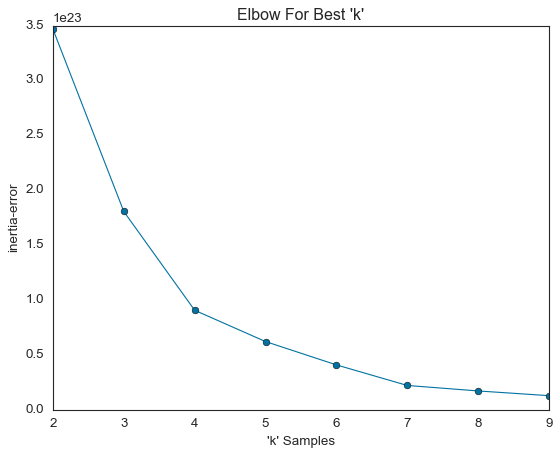

In [2630]:
ssd = []  # Sum Squared Distances
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X)
    ssd.append(model.inertia_)

plt.plot(K, ssd, "bo-")
plt.xlabel("'k' Samples" )
plt.ylabel("inertia-error") 
plt.title("Elbow For Best 'k'") 
# Due to Elbow >>> Best "k" = 4

### Yellowbrick >>> Best "k"

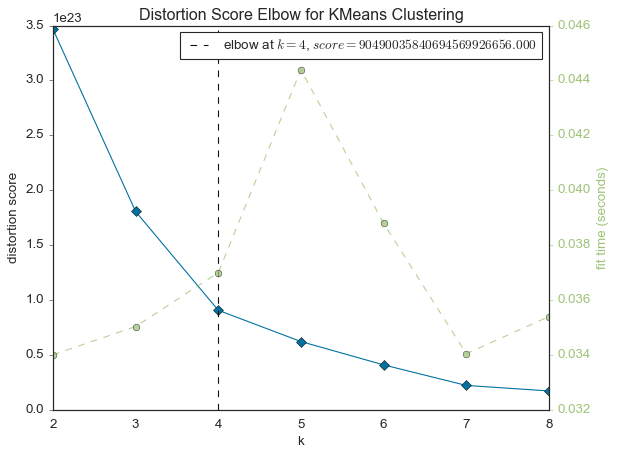

In [2631]:
from yellowbrick.cluster import KElbowVisualizer
model_ = KMeans(random_state=42)

visualizer = KElbowVisualizer(model_, k=(2,9))
visualizer.fit(X)     
visualizer.show();
# Due to Yellowbrick >>> Best "k" = 4

### Silhouette

In [2632]:
from sklearn.metrics import silhouette_score
silhouette_score(X, model.labels_)
# For k=8 clusters

0.43951340923940857

In [2633]:
range_n_clusters = range(2,9)

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")
# Best Silhouette Score >>> For "k"=4 >>> 0.5062276252716669     

For n_clusters=2, the silhouette score is 0.6560889955096918
For n_clusters=3, the silhouette score is 0.5498384458186538
For n_clusters=4, the silhouette score is 0.5062276252716669
For n_clusters=5, the silhouette score is 0.5022149314673514
For n_clusters=6, the silhouette score is 0.5417897981878276
For n_clusters=7, the silhouette score is 0.5299059876890396
For n_clusters=8, the silhouette score is 0.4890620582309457


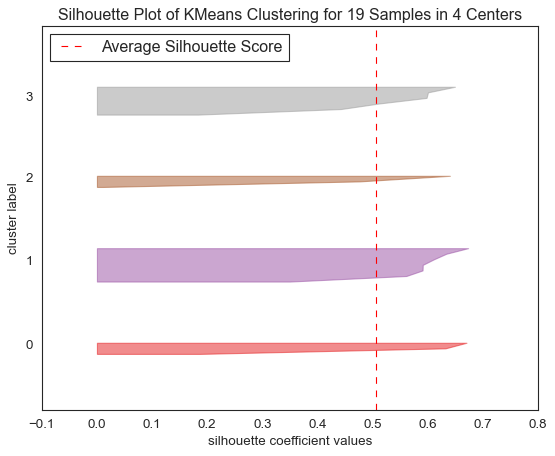

In [2634]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

model4 = KMeans(n_clusters=4, random_state=42)
visualizer = SilhouetteVisualizer(model4)
visualizer.fit(X)
visualizer.poof();

### Model With "k"=4

In [2635]:
model = KMeans(n_clusters =4, random_state=42)
model.fit_predict(X)

array([0, 0, 0, 2, 2, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3])

In [2636]:
model.labels_

array([0, 0, 0, 2, 2, 3, 3, 2, 3, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3])

In [2637]:
clusters = model.labels_
df["Class"] = clusters
df.head()

,year,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,...,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class
0,2002,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.973500,57.999863,14.054762,...,10.728,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0
1,2003,56.054279,2.558000e+11,33.929963,31.017063,23.421341,1.246865,60.245820,48.578784,14.010660,...,10.714,10.104,57.556527,-0.183856,0.052294,-0.766921,0.043717,0.151064,-0.033271,0
2,2004,60.873972,3.364000e+11,33.201796,26.873473,23.534784,1.269765,50.529804,41.284589,16.572396,...,10.788,10.988,63.940793,-0.175138,0.008839,-0.834218,0.057826,0.126244,0.013202,0
3,2005,65.852952,4.211000e+11,38.678568,25.821531,23.355738,1.276345,44.825451,36.117277,21.223736,...,10.451,11.181,69.207544,-0.031314,0.154204,-0.601539,0.277378,0.159731,0.000234,2
4,2006,72.173019,4.643000e+11,40.397518,27.861236,22.884205,1.266605,43.132762,33.076850,24.723486,...,8.586,9.096,75.966220,0.027346,0.120086,-0.589657,0.289125,0.048252,-0.064095,2


In [2638]:
df.sort_values(by="Class").Class.unique()

array([0, 1, 2, 3])

In [2639]:
print(f"Class_0 : {list(df[df.Class == 0].year.unique())}")
print(f"Class_1 : {list(df[df.Class == 1].year.unique())}")
print(f"Class_2 : {list(df[df.Class == 2].year.unique())}")
print(f"Class_3 : {list(df[df.Class == 3].year.unique())}")

Class_0 : [2002, 2003, 2004]
Class_1 : [2011, 2012, 2013, 2014, 2015, 2016, 2017]
Class_2 : [2005, 2006, 2009]
Class_3 : [2007, 2008, 2010, 2018, 2019, 2020]


In [2640]:
clusters = model.labels_
X["Class"] = clusters
X.head()

,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,epfngs,...,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class
0,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.973500,57.999863,14.054762,40.569552,...,10.728,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0
1,56.054279,2.558000e+11,33.929963,31.017063,23.421341,1.246865,60.245820,48.578784,14.010660,45.195297,...,10.714,10.104,57.556527,-0.183856,0.052294,-0.766921,0.043717,0.151064,-0.033271,0
2,60.873972,3.364000e+11,33.201796,26.873473,23.534784,1.269765,50.529804,41.284589,16.572396,41.301809,...,10.788,10.988,63.940793,-0.175138,0.008839,-0.834218,0.057826,0.126244,0.013202,0
3,65.852952,4.211000e+11,38.678568,25.821531,23.355738,1.276345,44.825451,36.117277,21.223736,45.348737,...,10.451,11.181,69.207544,-0.031314,0.154204,-0.601539,0.277378,0.159731,0.000234,2
4,72.173019,4.643000e+11,40.397518,27.861236,22.884205,1.266605,43.132762,33.076850,24.723486,45.769403,...,8.586,9.096,75.966220,0.027346,0.120086,-0.589657,0.289125,0.048252,-0.064095,2


In [2641]:
X.sort_values(by="Class").Class.unique()

array([0, 1, 2, 3])

In [2642]:
X.head(1)

,cpi,anni,bm,cgdt,coe,coubaa,dcpbfs,dctps,dctpsbb,epfngs,...,um,uf,wpi,coce,gee,psaaove,rqe,role,vaae,Class
0,46.096344,1.929000e+11,38.661392,38.252301,23.015411,1.207645,73.9735,57.999863,14.054762,40.569552,...,10.728,9.467,45.838839,-0.521816,0.083148,-0.808583,0.100937,-0.027365,-0.219571,0


In [2644]:
pred_class = X.groupby("Class").mean().T
pred_class.head()

Class,0,1,2,3
cpi,5.434153e+01,1.373085e+02,7.671182e+01,1.610649e+02
anni,2.617000e+11,7.472000e+11,4.737000e+11,6.257833e+11
bm,3.526438e+01,5.221570e+01,4.361187e+01,5.335728e+01
cgdt,3.204761e+01,3.432976e+01,3.459857e+01,3.898365e+01
coe,2.332385e+01,2.397992e+01,2.215814e+01,2.220444e+01


In [ ]:
# Class_0 : [2002, 2003, 2004]
# Class_1 : [2011, 2012, 2013, 2014, 2015, 2016, 2017]
# Class_2 : [2005, 2006, 2009]
# Class_3 : [2007, 2008, 2010, 2018, 2019, 2020]

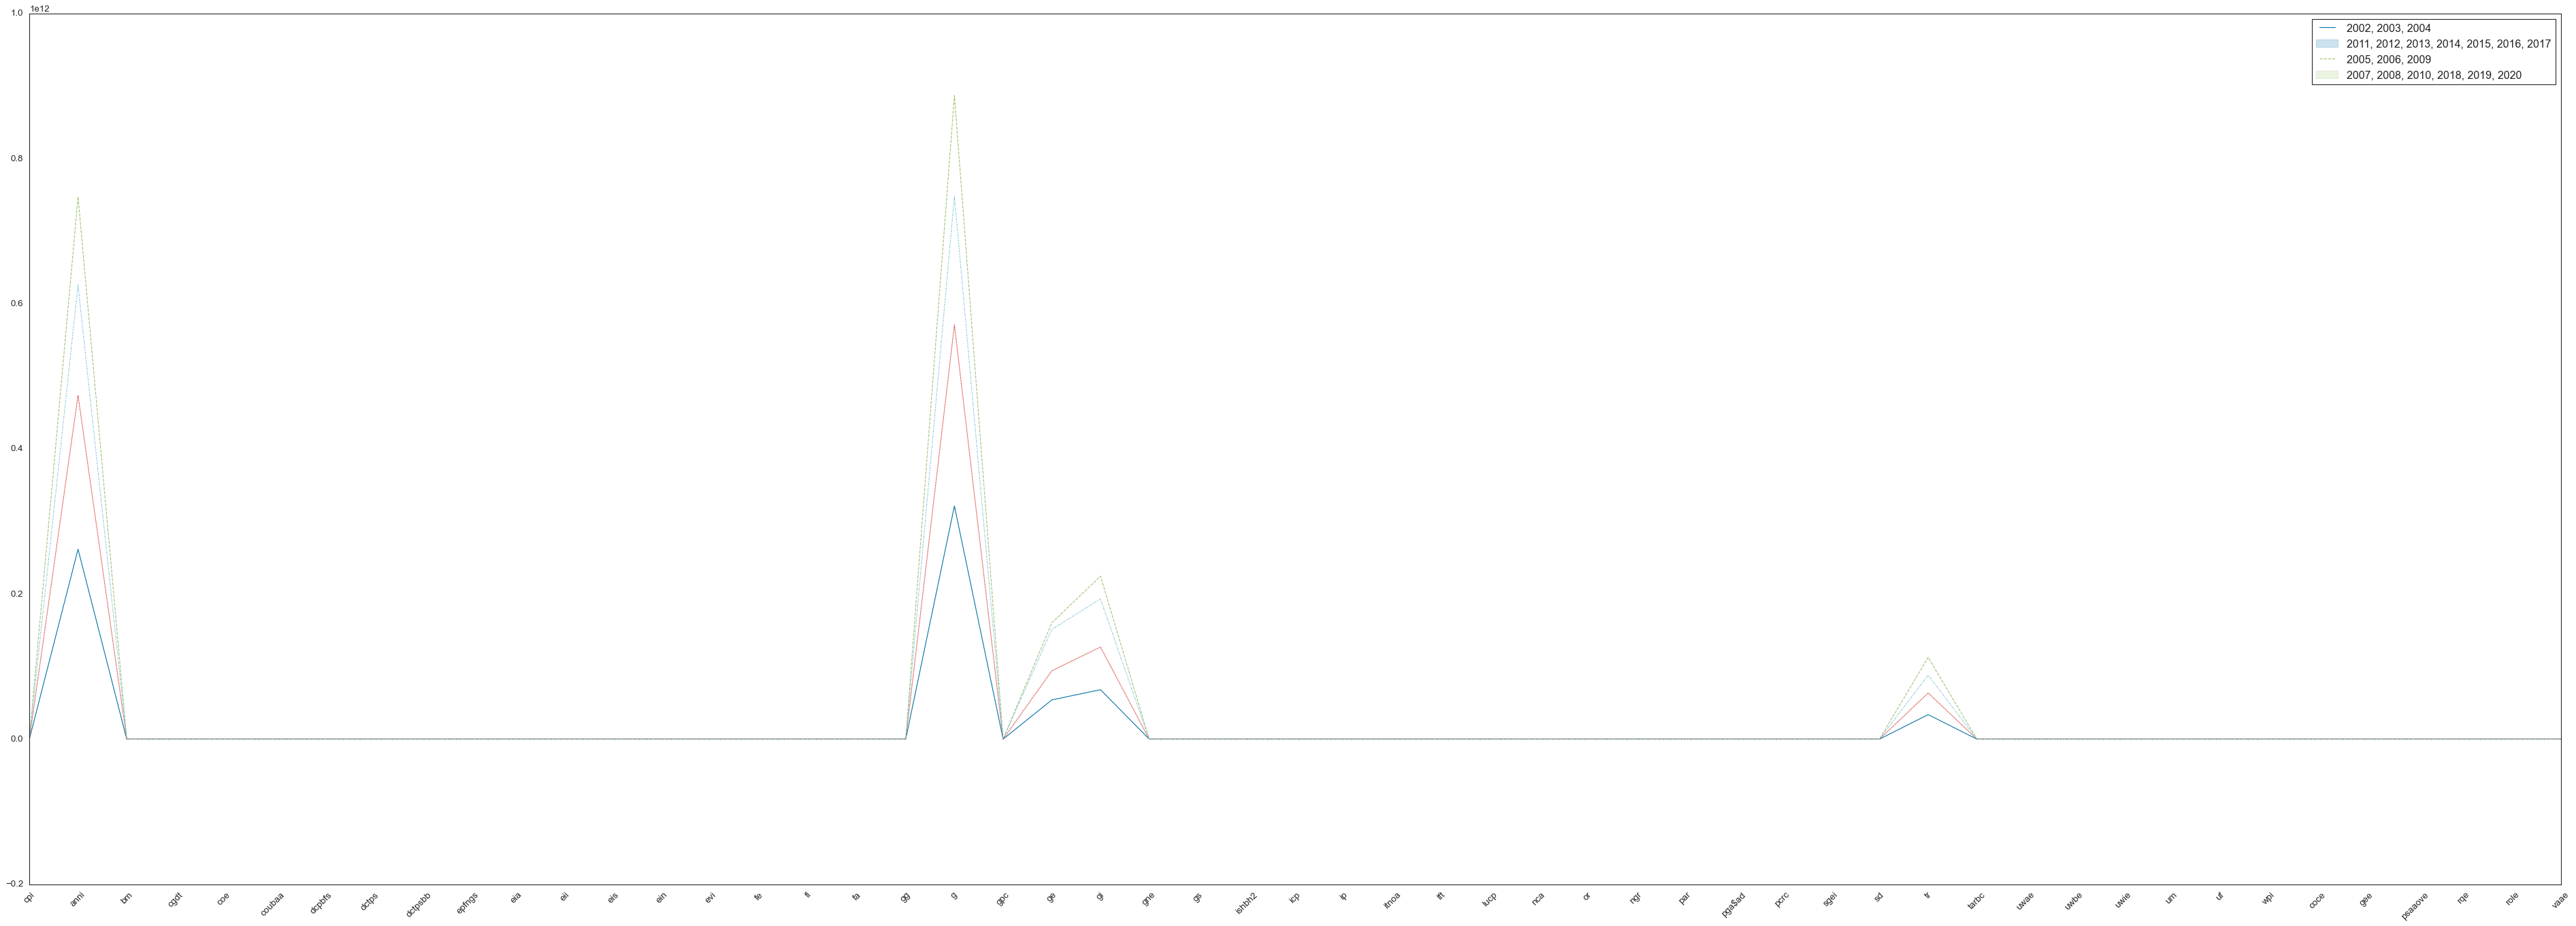

In [2652]:
plt.figure(figsize=(60,20))
sns.lineplot(data=pred_class)
plt.xticks(rotation=45)
plt.legend(labels=["2002, 2003, 2004",
                   "2011, 2012, 2013, 2014, 2015, 2016, 2017",
                   "2005, 2006, 2009",
                   "2007, 2008, 2010, 2018, 2019, 2020"]);